In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/Winedata.csv')
data

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White Wine,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6
1,White Wine,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6
2,White Wine,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6
3,White Wine,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6
4,White Wine,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,White Wine,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6
32481,White Wine,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5
32482,White Wine,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6
32483,White Wine,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7


In [3]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [5]:
data.fillna(data.mean(), inplace=True)

<ipython-input-5-a20208f658ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [6]:
data['Type'].unique()

array(['White Wine', 'Red Wine'], dtype=object)

In [7]:
# data["Type"][data["Type"] == "white"] = 1
data["Type"][data["Type"] == "White Wine"] = 1
# data["Type"][data["Type"] == "red"] = 0
data["Type"][data["Type"] == "Red Wine"] = 0

<ipython-input-7-62a9e17a9c4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] == "White Wine"] = 1
<ipython-input-7-62a9e17a9c4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] == "Red Wine"] = 0


In [8]:
data

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6
1,1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6
2,1,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6
3,1,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6
4,1,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,1,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6
32481,1,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5
32482,1,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6
32483,1,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


X = data.drop(columns=['quality'])
y = data['quality']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Further split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

#Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

#defining some hyperparameters to search in Gridsearch (as it was not mentioned i have used the most common parameters)
param_grid = {'n_estimators': [50,100, 200],'max_depth': [None, 5,10,15],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# #GridSearchCV for hyperparameter tuning According to our hard coded values
GS2 = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
GS2.fit(X_train, y_train)

parameters = GS2.best_params_

#printing the best hyperparameters
print("Best Hyperparameters:",parameters)


#model with the best parameters on the test set
base_model = RandomForestClassifier(**parameters, random_state=42)


# base_model = RandomForestClassifier(n_estimators=200,min_samples_split=10,max_depth=None)
rf_b = BaggingClassifier(base_model, n_estimators=10, random_state=42)

rf_b.fit(X_train, y_train)
y_pred = rf_b.predict(X_test)
testingS=rf_b.score(X_test, y_test)
y_pred_train=rf_b.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
accuracy2 = accuracy_score(y_test, y_pred)

#Test Set Accuracy with Best Hyperparameters
# print("Test Set Accuracy with Best Hyperparameters: ",testingS)

print(f"Accuracy(Train): {accuracy1*100:.2f}%")
print(f"Accuracy(Test): {accuracy2*100:.2f}%")

# Classification report on the test data
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy(Train): 99.87%
Accuracy(Test): 98.11%
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.83      0.91        29
           4       1.00      0.95      0.98       212
           5       0.98      0.98      0.98      2223
           6       0.97      0.99      0.98      2764
           7       0.99      0.98      0.99      1088
           8       1.00      0.97      0.98       178
           9       1.00      1.00      1.00         3

    accuracy                           0.98      6497
   macro avg       0.99      0.96      0.97      6497
weighted avg       0.98      0.98      0.98      6497



In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_train, y_pred_train)

# Calculate Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test, y_pred)
mae2 = mean_absolute_error(y_train, y_pred_train)

# Calculate R-squared (R2) score
r21 = r2_score(y_test, y_pred)
r22 = r2_score(y_train, y_pred_train)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)

# Print the results
print("TEST:")
print(f"Mean Squared Error (MSE): {mse1:.2f}")
print(f"Root Mean Squared Error (MSE): {rmse1:.2f}")
print(f"Mean Absolute Error (MAE): {mae1:.2f}")
print(f"R-squared (R2) Score: {r21:.2f}")

print("TRAIN:")
print(f"Mean Squared Error (MSE): {mse2:.2f}")
print(f"Root Mean Squared Error (MSE): {rmse2:.2f}")
print(f"Mean Absolute Error (MAE): {mae2:.2f}")
print(f"R-squared (R2) Score: {r22:.2f}")

TEST:
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (MSE): 0.16
Mean Absolute Error (MAE): 0.02
R-squared (R2) Score: 0.96
TRAIN:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (MSE): 0.05
Mean Absolute Error (MAE): 0.00
R-squared (R2) Score: 1.00


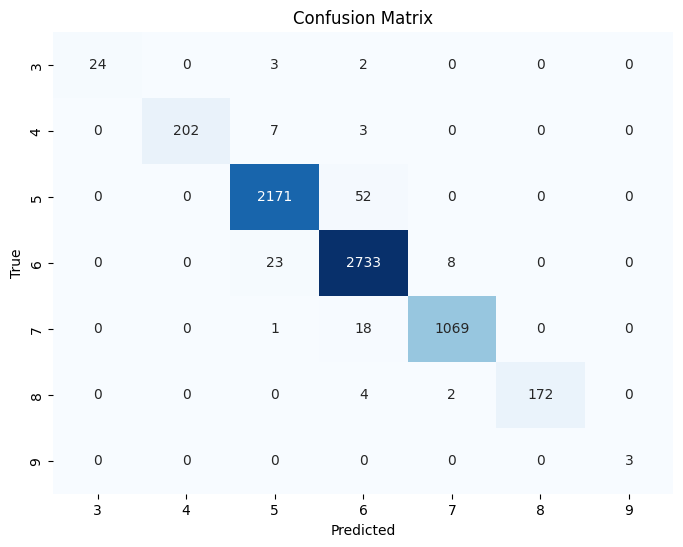

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[3,4,5,6,7,8,9],
            yticklabels=[3,4,5,6,7,8,9])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()